In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

D = pd.read_csv("df_final_56.csv")
D = D.drop('Unnamed: 0',axis=1)
D = D.drop('Channels',axis=1)
D = D.drop('IZ',axis=1)
D = D.drop('EP',axis=1)
D = D.drop('patient',axis=1)


D

,outcome,SigResp,SigStim,N1RespAvg,N1RespSDV,N2RespAvg,N2RespSDV,P2RespAvg,P2RespSDV,N1StimAvg,N1StimSDV,N2StimAvg,N2StimSDV,P2StimAvg,P2StimSDV,InDegree,OutDegree,EV,Closeness
0,1.0,0.000000,0.064516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.290183,2.011706,3.724259,3.460362,2.796966,3.000218,0.000000,0.071429,4.993936e-14,0.000000
1,0.0,0.000000,0.193548,1.808045,1.676081,2.493333,2.341456,1.630795,1.577302,5.557560,9.957544,5.060794,6.246739,4.478926,6.889325,0.000000,0.214286,4.993936e-14,0.000000
2,1.0,0.064516,0.193548,7.116911,19.154270,4.252294,5.048311,3.042083,4.170923,6.103548,14.745868,3.809967,3.367630,1.821021,1.867067,0.071429,0.214286,7.960633e-04,0.174603
3,0.0,0.290323,0.096774,4.306443,3.856300,4.059026,4.970039,2.876449,3.447806,1.939979,2.173960,1.695722,1.598789,1.574253,2.044144,0.321429,0.107143,1.590588e-01,0.480159
4,0.0,0.096774,0.258065,5.792531,15.863221,3.143365,3.299196,2.067806,3.085698,5.036293,7.764073,3.585250,3.693649,3.242192,3.639533,0.107143,0.285714,4.743272e-03,0.218807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0.0,0.222222,0.333333,8.915076,18.302456,5.680937,5.766993,5.145954,8.462617,12.084077,19.253397,5.480859,5.445865,6.831070,9.627777,0.333333,0.500000,3.424386e-01,0.444444
311,0.0,0.222222,0.222222,11.842813,19.439725,3.905678,4.341816,7.044353,11.037299,12.590665,20.947207,5.404999,5.925390,5.961460,9.119861,0.333333,0.333333,3.424386e-01,0.380952
312,0.0,0.222222,0.222222,13.050087,22.640450,5.441466,7.348156,6.565693,12.005671,7.685029,13.888659,3.403096,2.047038,3.980286,5.787554,0.333333,0.333333,4.270118e-01,0.444444
313,0.0,0.111111,0.222222,8.785383,19.558475,4.092359,6.130437,5.116876,9.170152,8.646140,14.915351,5.620700,5.627436,6.728293,10.994113,0.166667,0.333333,1.900403e-01,0.266667


In [57]:
Pos = D[D.outcome == 1].drop('outcome',axis =1)
Neg = D[D.outcome == 0].drop('outcome',axis =1)
D.drop('outcome',axis =1).columns.values.tolist()

['SigResp',
 'SigStim',
 'N1RespAvg',
 'N1RespSDV',
 'N2RespAvg',
 'N2RespSDV',
 'P2RespAvg',
 'P2RespSDV',
 'N1StimAvg',
 'N1StimSDV',
 'N2StimAvg',
 'N2StimSDV',
 'P2StimAvg',
 'P2StimSDV',
 'InDegree',
 'OutDegree',
 'EV',
 'Closeness']

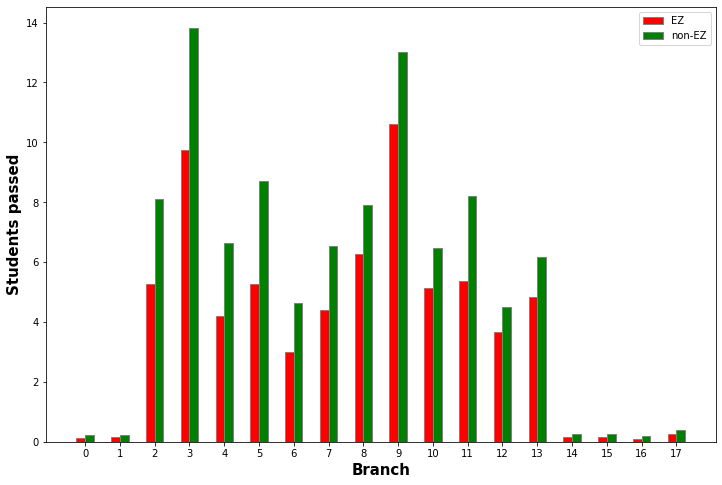

In [59]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

EZ = Pos.mean().values
non_EZ = Neg.mean().values

EZ_err = Pos.std().values
non_EZ_err = Neg.std().values

br1 = np.arange(len(EZ))
br2 = [x + barWidth for x in br1]

plt.bar(br1, EZ, color ='r', width = barWidth,
        edgecolor ='grey', label ='EZ')
plt.bar(br2, non_EZ, color ='g', width = barWidth,
        edgecolor ='grey', label ='non-EZ')

plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth/2 for r in range(len(EZ))], range(18))

#plt.xticks([r + barWidth/2 for r in range(len(EZ))], D.columns.values.tolist())
 
plt.legend()
plt.show()